<a href="https://colab.research.google.com/github/benject/deep_learning/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

logistic python implement

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import os
from google.colab import drive
drive.mount('/content/drive')


import numpy as np

def sigmoid(z):

  '''sigmoid 激活函数'''

  return(1.0/(1.0 + np.exp(-z)))



def loss( real_result , predict_result):

  '''损失函数'''

  result = -( real_result*np.log(predict_result) + (1 - real_result)*np.log(1-predict_result))  
  return result


def gradient_w(input,real_result,predict_result):

  '''
  梯度下降
  第一步 令 y = loss（a） 对损失函数的求导 dy/da 的结果是 -y/a + (1-y)/(1-a)
  计算过程参见 https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

  第二步 令 a = sigmoid（z） 对sigmoid函数求导 da/dz 的结果是 a(1-a)
  计算过程参见 https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

  第三步 根据链式求导法则 dydz = dy/da * da/dz = (-y/a + (1-y)/(1-a)) * a(1-a) = -y(1-a) + a(1-y) = -y + ay + a - ay = a - y

  第四步 令 z = w1x1 + w2x2 + b 对函数求w1的偏导数 dz/dw1 = x1 以此类推

  那么： dy/dw1 = dz * dz/dw1 = x1 * (a - y) 

  可以发现 由于精妙的激活函数和损失函数的设计，预测值对参数值的梯度 就是 预测值与真值的差 再乘以输入
  '''
  
  return( input *(predict_result - real_result) )





class MyNeuron:

  def __init__(self,w,b):
    self.w = w
    self.b = b
    self.learning_rate = 1

    self.lr_w = 0  ##ada learning rate 自适应的学习率 可以极大提高学习效率
    self.lr_b = 0  ##ada learning rate 自适应的学习率 可以极大提高学习效率

  def forward(self,x):
    z = np.dot(self.w.T,x) + self.b
    assert(z.shape == (1,100))
    return sigmoid(z)

  def gradient_decent_v(self,X,Y,A):

    assert(X.shape==(2,100))

    m = X.shape[1]
      
    #向量化实现
    DZ = A - Y

    assert(DZ.shape==(1,100))

    #X.shape = (nx,m) DZ.shape = (1,m) 
    # np.dot(X,DZ.T).shape = (nx,1)  

    dw = 1/m * np.dot(X, DZ.T)
    db = 1/m * np.sum(DZ)
    return dw , db

  
  def optimization(self,dw,db):

    self.lr_w = self.lr_w + np.power(dw,2) ##ada learning rate 自适应的学习率 可以极大提高学习效率
    new_w = self.w - self.learning_rate / np.sqrt(self.lr_w) * dw ##ada learning rate 自适应的学习率 可以极大提高学习效率
    #new_w = self.w - self.learning_rate * dw

    self.lr_b = self.lr_b + db**2 ##ada learning rate 自适应的学习率 可以极大提高学习效率
    new_b = self.b - self.learning_rate / np.sqrt(self.lr_b) * db ##ada learning rate 自适应的学习率 可以极大提高学习效率
    #new_b = self.b - self.learning_rate * db
    return new_w,new_b


  def update_w(self,w):
    self.w = w
  
  def update_b(self,b):    
    self.b = b


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

'''
#填充数据
X = np.zeros((2,600))
Y = np.zeros((600))

for i in range(300):

  X[0,i] = np.random.rand() * 0.1 + 1.8
  X[1,i] = np.random.rand() * 0.001 + 0.085
  Y[i] = 1.0

for i in range(300):

  X[0,300+i] = np.random.rand() * 0.1 + 1.5
  X[1,300+i] = np.random.rand() * 0.001 + 0.045
  Y[300+i] = 0.0

print(X.shape)

Y = Y.reshape(1,600)

print(Y.shape)
'''

df=pd.read_csv("./drive/MyDrive/Colab Notebooks/ex2data1.txt",header=None)
X=df.iloc[:,:-1].values / 100
Y=df.iloc[:,-1].values


X = X.reshape(2,100)
Y = Y.reshape(1,100)
print(X.shape)
print(Y.shape)



(2, 100)
(1, 100)


0.6349650120610356
[[1.5391868 ]
 [2.80186428]]
-2.442630327240402


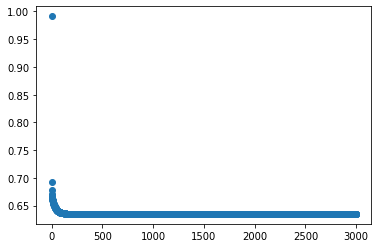

In [ ]:
from numpy.lib.function_base import gradient
import matplotlib.pyplot as plt


j = 0
j_arr = []


'''
#非向量化实现
a = 0 
dw1 = 0.0 
dw2 = 0.0
db = 0
for e in range(10000):

  for i in range(600):

    a = neu.forward(X.T[i])
    dw1 += gradient_w(X[0][i],Y[i],a)
    dw2 += gradient_w(X[1][i],Y[i],a)
    db += gradient_b(Y[i],a)
    j += loss(Y[i],a)

  dw1 /= 600
  dw2 /= 600
  db /= 600
  j /= 600


  
  neu.update_w(np.array([dw1,dw2]).T)
  neu.update_b(np.array(db))
  plt.scatter(e,j)

  print(j)
  if(j<0.05):
    break
   /
'''
#向量化实现


#随机初始化权重 和 偏置
#w = np.array([[0.35],[0.45]]) # w shape is :(2, 1)
#b = 1.31

w = np.zeros((2,1))
b = 0

#实例化一个神经元
neu = MyNeuron(w,b)

m = X.shape[1]

for e in range(3000):
  
  A = neu.forward(X)  #A shape is (1,m)
  dw,db = neu.gradient_decent_v(X,Y,A) #DW shape is (2,1) 
  j = 1/m * np.sum(loss(Y,A))

  j_arr.append(j)
  #if(j<0.05):
  #  break

  new_w , new_b = neu.optimization(dw,db)
  
  neu.update_w(new_w)
  neu.update_b(new_b)

plt.scatter(np.arange(len(j_arr)),j_arr)

print(j)
print(neu.w)
print(neu.b)

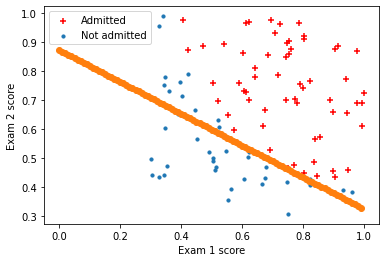

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv("./drive/MyDrive/Colab Notebooks/ex2data1.txt",header=None)
xx=df.iloc[:,:-1].values/100
yy=df.iloc[:,-1].values

pos , neg = (yy==1).reshape(100,1) , (yy==0).reshape(100,1)
plt.scatter(xx[pos[:,0],0],xx[pos[:,0],1],c="r",marker="+")
plt.scatter(xx[neg[:,0],0],xx[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)



www1 = np.arange(100)/100
www2 = -neu.b / neu.w[1,0] - ( neu.w[0,0] / neu.w[1,0] * www1 )

plt.scatter(www1,www2)


接下来使用pytorch实现

In [ ]:

import torch

class torchLogisticRegression(torch.nn.Module):

  def __init__(self):

    super().__init__()
    
    self.linear = torch.nn.Linear(2, 1)  #一个线性层 代表为 y=xW.T + b 。 在这里 w是参数矩阵 维度为（1，n） ；x是数据 维度为（m，n） b是偏置项 ； 参数（2，1）代表2个特征和1个输出
    self.lossFun = torch.nn.BCELoss()
    self.optim = torch.optim.Adam(self.parameters(),lr=1.) #优化器 
  
  def forward(self,x):

    result = torch.sigmoid(self.linear(x)) # 用 sigmoid 激活函数 
    return result


torchLR = torchLogisticRegression()

X1 = torch.from_numpy(X.T) #如果是从numpy 的ndarray 数据。一定要用torch.from_numpy做转换 
Y1 = torch.from_numpy(Y.T) #如果是从numpy 的ndarray 数据。一定要用torch.from_numpy做转换 

X1

for i in range(10000):

  A = torchLR.forward(X1.float())


  loss = torchLR.lossFun(A.float(),Y1.float())
  torchLR.optim.zero_grad()

  loss.backward()

  torchLR.optim.step()


#打印参数值
for name, param in torchLR.named_parameters():
    if param.requires_grad:
        print( name, param.data)


linear.weight tensor([[1.5323, 2.7979]])
linear.bias tensor([-2.4479])
